# ICS 434: DATA SCIENCE FUNDAMENTALS

## Performance Evaluation: Classification 

---

## Slide Credits

Most of these slides were taken from Mahdi Belcaid.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

### Data Set

* This Session is based on Chapter 3 of ["Hands-On Machine Learning with Scikit-Learn and TensorFlow"](http://shop.oreilly.com/product/0636920052289.do)

* We will use the MNIST dataset 

* Image of (28*28) pixels representing digits

In [14]:
data = pd.read_csv("data/mnist.tsv", index_col=[0], sep="\t")
data.head()

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_775,Pixel_776,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X, y = data.iloc[:, 0:-1], data['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Splitting the Data Into Training and Testing

* The data we loaded contains both training and testing chunks

 * The training is contained in the first 60k instances

 * The training is contained in the remaining 10k instances
* The data is oreder by class (all 0s first, then all 1s, etc...)
  * we need to shuflle it

In [19]:
X.iloc[36000].head(20)

Pixel_0     0
Pixel_1     0
Pixel_2     0
Pixel_3     0
Pixel_4     0
Pixel_5     0
Pixel_6     0
Pixel_7     0
Pixel_8     0
Pixel_9     0
Pixel_10    0
Pixel_11    0
Pixel_12    0
Pixel_13    0
Pixel_14    0
Pixel_15    0
Pixel_16    0
Pixel_17    0
Pixel_18    0
Pixel_19    0
Name: 36000, dtype: int64

In [20]:
some_digit = X.iloc[36000]
y[36000]

5

In [21]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [22]:
shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

## Binary Classifier

In [23]:
y_train

54402    9
25559    4
811      0
59286    9
31593    5
        ..
5953     1
535      0
25059    4
36977    6
27661    4
Name: target, Length: 60000, dtype: int64

In [24]:
y_train_5 = (y_train == 5)

y_test_5 = (y_test == 5)

### Classifying the Digits Data

* We are going to train a simple Stochastic Gradient Descent Classifier

  * We will only focus on the digit 5 

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn_cls = KNeighborsClassifier(n_neighbors=25)

knn_cls.fit(X_train, y_train_5)

KNeighborsClassifier(n_neighbors=25)

### Testing on a Single Value

* We test it on the digit (some_digit), which we know represents 5

In [31]:
X.iloc[31986]

Pixel_0      0
Pixel_1      0
Pixel_2      0
Pixel_3      0
Pixel_4      0
            ..
Pixel_779    0
Pixel_780    0
Pixel_781    0
Pixel_782    0
Pixel_783    0
Name: 31986, Length: 784, dtype: int64

In [32]:
knn_cls.predict(X.iloc[[31986]])

array([ True])

In [33]:
# What is the different between both?
# X.iloc[31986]
# X.iloc[[31986]]

### Predicting the Accuracy


* We use cross-validation to predict the accuracy


* Number of correct predictions of the digit 5
  * Not that the RMSE is not appropriate here 
  

In [34]:
y_train_pred = knn_cls.predict(X_train)

In [35]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [36]:
y_train_5

54402    False
25559    False
811      False
59286    False
31593     True
         ...  
5953     False
535      False
25059    False
36977    False
27661    False
Name: target, Length: 60000, dtype: bool

In [37]:
len(X_train)

60000

In [38]:
sum(y_train_pred == y_train_5)/len(X_train)

0.9930666666666667

### Are the Results Good?


*  The score are pretty good, but that does not mean that our classifier does well


*  There are only 5421 instance that have 5 as a label


*  If we predict all values to be non-5, our accuracy will be  $ (60000 - 5421.0) / 60000 = 0.90965$


* This is not a good indicator of accuracy with this data set


### Confusion Matrix

* A much better way to evaluate the data is using a confusion matrix
 * Number of times class A  is classified as class B


In [25]:
sum(y_train_5)

5421

In [39]:
from sklearn.metrics import confusion_matrix


confusion_matrix(y_train_5, y_train_pred)


array([[54452,   127],
       [  289,  5132]])

<img src="images/confusion_matrix.png" alt="drawing" style="width:600px;"/>

### The Precision

* Note that for a perfect predictor, the off-diagonal values will be 0

* An important metric that can be extracted from the confusion matrix is the Precision 
$$
\text{Precision} = \frac{TP}{TP+FP}
$$

* The `%` of correct predictions of the positive class
  * Among all the instances we predicted as 5, how many were correct?


In [140]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.9758509222285605

### The Recall 


* Another important metric that can be extracted from the confusion matrix is the Recall 
$$
\text{Recall} = \frac{TP}{TP+FN}
$$


* The recall and precision are typically used together

* The % of instances of the positive class we are able able to identify

  * Among all the instances of the class 5 in our data, how many did were correctly identified?



In [141]:
recall_score(y_train_5, y_train_pred)

0.9466888028039108

### The F1 Score

- The F$_1$ score is a convenient metric that combines both Precision and Recall
$$ 
F_1 = 2\times\frac{Precision\times Recall}{Precision + Recall}
$$
- It's a harmonic mean of the Precision and Recall


In [142]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.9610486891385767

### The Precision/Recall Tradeoff


<img src="images/precision_recall.png" alt="drawing" style="width:600px;"/>


* Scikit has a useful function `precision_recall_curve` to compute how the precisions and recall change with the threshold

In [158]:
y_train_probs = knn_cls.predict_proba(X_train)

In [159]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_train_probs[:,1])

# precision and recall don't have the same dim as threshold. 
# 1 and 0 are added for precision and recall respectively

(0.0, 1.0)

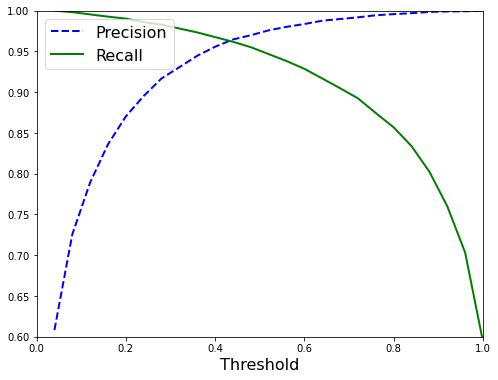

In [161]:
pyplot.figure(figsize=(8, 6))
pyplot.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
pyplot.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
pyplot.xlabel("Threshold", fontsize=16)
pyplot.legend(loc="upper left", fontsize=16)
pyplot.ylim([0.6, 1])
pyplot.xlim([0, 1])


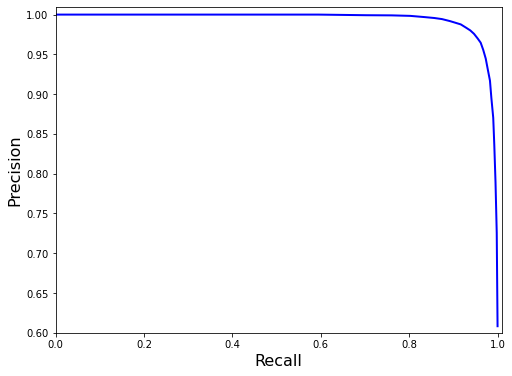

In [166]:

pyplot.figure(figsize=(8, 6))
pyplot.plot(recalls, precisions, "b-", linewidth=2)
pyplot.xlabel("Recall", fontsize=16)
pyplot.ylabel("Precision", fontsize=16)
_ = pyplot.axis([0, 1.01, 0.6, 1.01])


### Finding the Best Threshold

* The precion recall curve allow you to better select your score (threshold)

  * This is typically 

* Remember that "there is no free lunch"
  * This is a rather well behaved exmaple